## Image Processing Project

### Team Members

1. Joglekar, Aditya : 3189939
2. Morbagal ,Tejas  : 3200842 
3. Rajan Heena : 3205531 
4. Khan, Saba : 3179769
5. Kochar, Pratika : 3201097
5. Shetty. Sachin : 3201423
6. Malik, Hirra : 3212661
  

### Task 1

In [1]:
RMIN = 10
RMAX = 40

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


def compute_new_image(height, width, pix):

    for i in range(height):
        for j in range(width):
            distance = np.sqrt(np.square(i - height/2) + np.square(j - width/2))
            if(RMIN <= distance and RMAX >= distance):
                pix[i,j] = 0

    return pix


In [2]:
def display_output_t1():
    
    # Open the image
    img = Image.open('images/clock.jpg')
    # Plot the original Image
    plt.figure('Question 1')
    plt.subplot(121)
    plt.title('Original Image')
    plt.imshow(img)

    
    # Compute new image
    pix = img.load()
    [height, width] = img.size
    pix = compute_new_image(height, width, pix)
    img.save('images/t1_output_modified.jpg')

    # Plot the modified Image
    plt.subplot(122)
    plt.title('Modified Image')
    plt.imshow(img)
    plt.show()


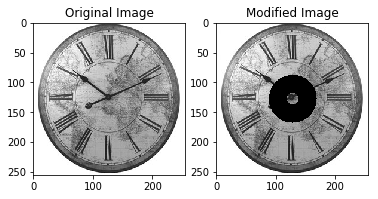

In [3]:
display_output_t1()

#### Observation :- 

As we increase or decrease the values for rmin and rmax, the area of the ring increases/ decreases.


#### What we learnt:-

- how to read and save images
- how to calculate the size of the image

### Task 2

##### Added as separate files

### Task 3 - Implementation of Band Pass Filter

#### Task 3:-

#####  Steps 

1. Read the image
2. Compute the Fourier transform
3. Shift the higher frequencies to the centre
4. Calculate the height and width of the image and  find the centre position.
5. Take each pixel position and calculate the euclidean distance between each positions as we did in task 1
6. Suppress the frequencies outside the band
7. Compute the inverse Fourier transform



In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy
import scipy


In [5]:
def show_output_t3(img,fourier,image):
    
    plt.figure('Question 3')
    # Plot the original image
    plt.subplot(141),plt.imshow(img, cmap = 'gray'), plt.title('Original Image')

    # Plot the Image after taking log
    plt.subplot(142),plt.imshow(fourier, cmap = 'gray'), plt.title('Log Image')

    # Plot the Image after taking log of Band pass filtered image
    plt.subplot(143),plt.imshow(fourier, cmap = 'gray'), plt.title('Log Modified Image')

    # Plot the recreated image
    plt.subplot(144),plt.imshow(image, cmap = 'gray'), plt.title('Modified Image(without log)')
    plt.show()


In [6]:
def get_fourier_t3(image):
    
    # Perform the 2-D fast Fourier transform on the image data
    fourier = np.fft.fft2(image)
    
    
    # Move zero-frequency component to the center of the Fourier spectrum
    fshift = np.fft.fftshift(fourier)
    # compute the magnitudes (absolute values) of the complex numbers
    fourier = np.abs(fshift)
    # compute the common logarithm of each value to reduce the dynamic range
    fourier = np.log10(fourier)
    
    width = np.size(fshift,0)
    height = np.size(fshift,1)

    # Implementing Band-Pass filter
    for i in range(height):
        for j in range(width):
            distance = np.sqrt(np.square(i - height/2) + np.square(j - width/2))
            if(RMIN <= distance and RMAX >= distance):
                pass
            else:
                fshift[i,j] = 255     #Black , 0 for White


    fourier = np.abs(fshift)
    fourier = np.log10(fourier)
    
    fshift = get_fshift_t3(fourier, fshift)
    
    values = {"fourier": fourier, "fshift" : fshift}

    return values

In [7]:
def show_input_t3(image):
    plt.imshow(image,cmap='gray')

In [8]:
def get_fshift_t3(fourier, fshift):
        # Recreate image after doing inverse shift and inverse fourier transform
    f_ishift= np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back


In [29]:

## Main Function 


# Open the image
img = Image.open('images/clock.jpg')
# Load the image data in an numpy array
img_data = np.array(img)

values = get_fourier_t3(img_data)

fourier = values["fourier"]
img_back = values["fshift"]



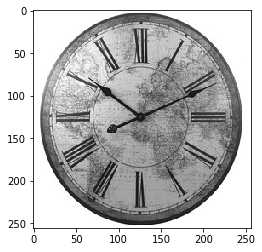

In [30]:
show_input_t3(img_data)

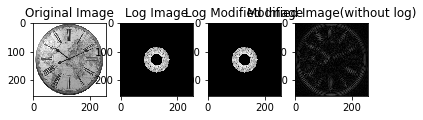

In [31]:

RMIN = 20
RMAX = 45
show_output_t3(img, fourier, img_back)


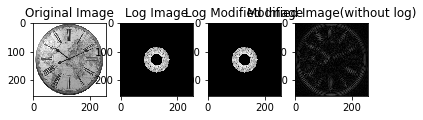

In [32]:
RMIN = 20
RMAX = 60
show_output_t3(img, fourier, img_back)

### High Pass
![High Pass](images/t3_op_high_pass.png)

### Low Pass
![Low Pass](images/t3_op_low_pass.png)

### Observation:-

- Limited frequencies are allowed between the range of rmin and rmax as such we get a blurred image, without sharpness and fine details.
- On increasing the width of band, the image appears more clearer.


#### We have tried low pass filter and high pass filter

 - Low pass filter:- In this case we allowed low frequencies (shifted at the center) and the output image is with finer details as compared to band pass filter since in the frequency domain,low frequencies determine the overall shape or pattern in the image.

 - High pass filter:- In this case we allowed high frequencies (away from the center) and the output image is even blurrier than band pass filter as high frequencies provide detail in the image, but they are often contaminated by the effects of noise.

    

#### Difficulty:- 

After computing the fourier transform, we were getting a complete black image. It was not at all clear, so we use fftshift function to shift the zero frequencies(or low frequencies to the center).  

#### What we learnt:-

- usage of functions like fft2, fftshift
- Lowest frequencies usually contain most of the information


### Task 4

In [12]:
# setup of libraries

import numpy as np
import scipy.misc as msc
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.spatial.distance import euclidean
from cmath import sqrt
import matplotlib.image as img

In [13]:
def get_inverse_fourier(input):
    
    # inverse of combined image
    combination = fft.ifftshift(input)
    combination = fft.ifft2(input)

    return np.abs(combination)

In [14]:
def get_magnitude_image(input):
    
    return np.abs(input)

In [15]:
def get_angle_image(input):
    
    return np.angle(input)

In [16]:
def combine_magnitude_phase(magnitude, phase):
    
    return magnitude * np.exp(phase * sqrt(-1) )

In [17]:
def apply_fourier(image1, image2):
    
    # fourier transform
    g_ft = fft.fft2(image1)
    h_ft = fft.fft2(image2)

    g_fftshift = fft.fftshift(g_ft)
    h_fftshift = fft.fftshift(h_ft)

    values = {"g_fftshift": g_fftshift, "h_fftshift": h_fftshift}
    
    return values

In [18]:
def merge_images(g, h):
    
    values = apply_fourier(g,h)
    
    # the absolute value of a complex number is the magnitude
    magnitude = get_magnitude_image(values["g_fftshift"])
    phase = get_angle_image(values["h_fftshift"])

    combination = combine_magnitude_phase(magnitude , phase)

    return get_inverse_fourier(combination)

In [19]:
# read image intensity 
def read_input_image(filename):
    
    f = img.imread(filename).astype("float")
    return f

In [20]:
def write_output_image(f, filename):
    
    img.toimage(f, cmin=0, cmax=255).save(filename)

In [21]:
# combination of face and face gill give exactly the face image!
def display_output(image1, image2):

    k = merge_images(image1, image2)
    plt.imshow(k,cmap='gray')

In [22]:
def display_input(image1, image2):
    
    plt.figure(1)
    plt.subplot(211)
    plt.imshow(image1,cmap='gray')
    plt.title('Bauckhage')
    plt.subplot(212)
    plt.imshow(image2,cmap='gray')
    plt.title('Clock')
    plt.show()

In [23]:
# read images global

face = read_input_image("images/bauckhage.jpg")
clock = read_input_image("images/clock.jpg")


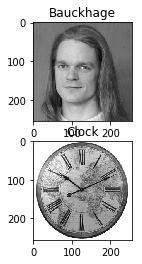

In [24]:
display_input(face,clock)

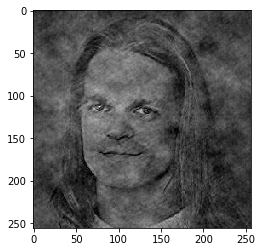

In [25]:
display_output(clock,face)


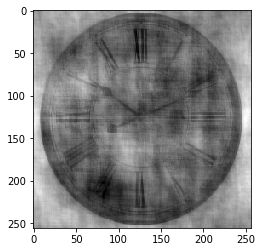

In [26]:
display_output(face, clock)

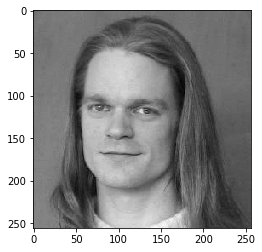

In [27]:
display_output(face,face)

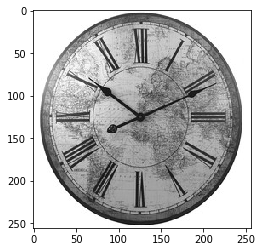

In [28]:
display_output(clock, clock)

### T4 

#### Difficulties Faced:

We figured out fftshift(i.e shifting the zero frequencies to the center , it is not always required after calculating the fourier transform, as magnitude and phase can be calculated directly from the fourier transform.

#### Observation :
when we merge two different images after applying fourier transform, output is a blurred image of the one which contains phase 
information as phase tells us "where" the frequency component is in the image. The magnitude tells us "how much" of a certain 
frequency is present.